# Twitter Sentiment Analysis

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
import string
import warnings


pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# read in train and test data

train = pd.read_csv('./data/train_E6oV3lV.csv')
test = pd.read_csv('./data/test_tweets_anuFYb8.csv')

## Data Inspection

label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist

In [3]:
# take a look at non-racist tweets
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [4]:
# take a look at racist tweets
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
train.shape

(31962, 3)

In [6]:
test.shape

(17197, 2)

In [7]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

Checking the distribution of the length of tweets

In [8]:
length_train = train.tweet.str.len()
length_test = test.tweet.str.len()

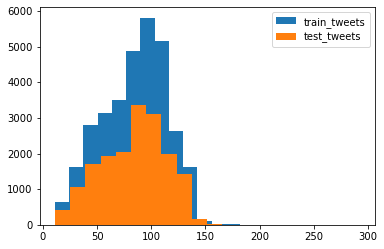

In [9]:
plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()
plt.show();

## Data Cleaning

first, going to combine the datasets for cleaning. then I will restore them to train - test.

In [10]:
combi = train.append(test, ignore_index=True)

In [11]:
combi.shape

(49159, 3)

In [12]:
# function to remove unwanted text

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

### 1) remove username

In [13]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [14]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2) remove punctuation, special characters

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^ a-zA-Z#]", " ")

In [16]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### 3) normalize text with PortStemmer

In [17]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

In [18]:
tokenized_tweet.head()

0                    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, #run]
1    [thanks, for, #lyft, credit, i, can, t, use, cause, they, don, t, offer, wheelchair, vans, in, pdx, #disapointed, #getthanked]
2                                                                                                           [bihday, your, majesty]
3                                                                       [#model, i, love, u, take, with, u, all, the, time, in, ur]
4                                                                                           [factsguide, society, now, #motivation]
Name: tidy_tweet, dtype: object

normalize tokened tweets

In [19]:
from nltk.stem.porter import *

stemmer=PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

and put them back together with nltk's MosesDetokenizer function

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

### Data Visualization

In [21]:
# word cloud

all_words = ' '.join([text for text in combi['tidy_tweet']])

from wordcloud import WordCloud

In [22]:
wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(all_words)

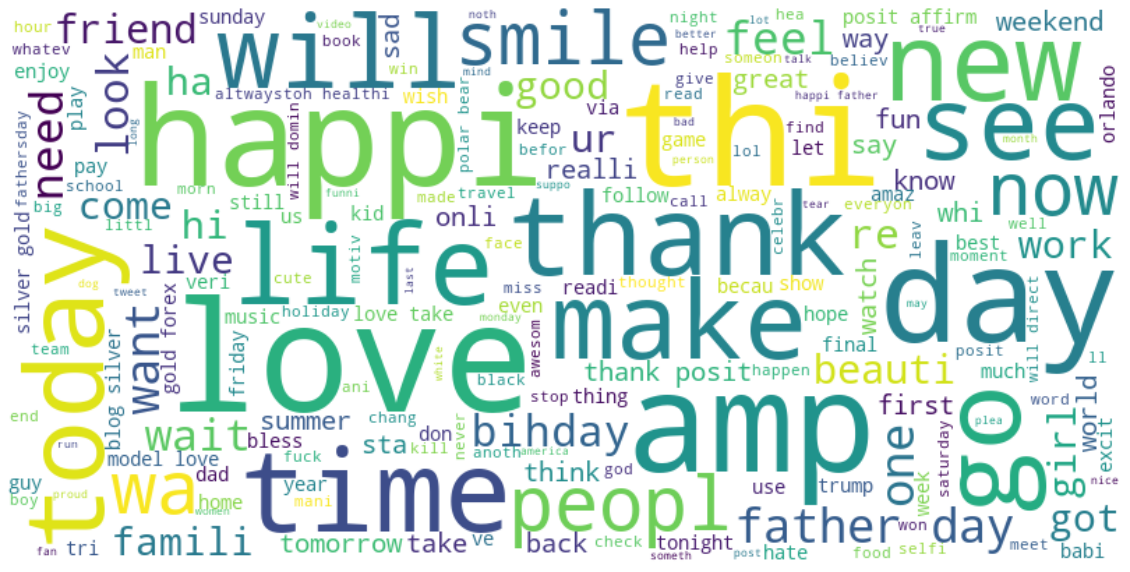

In [23]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

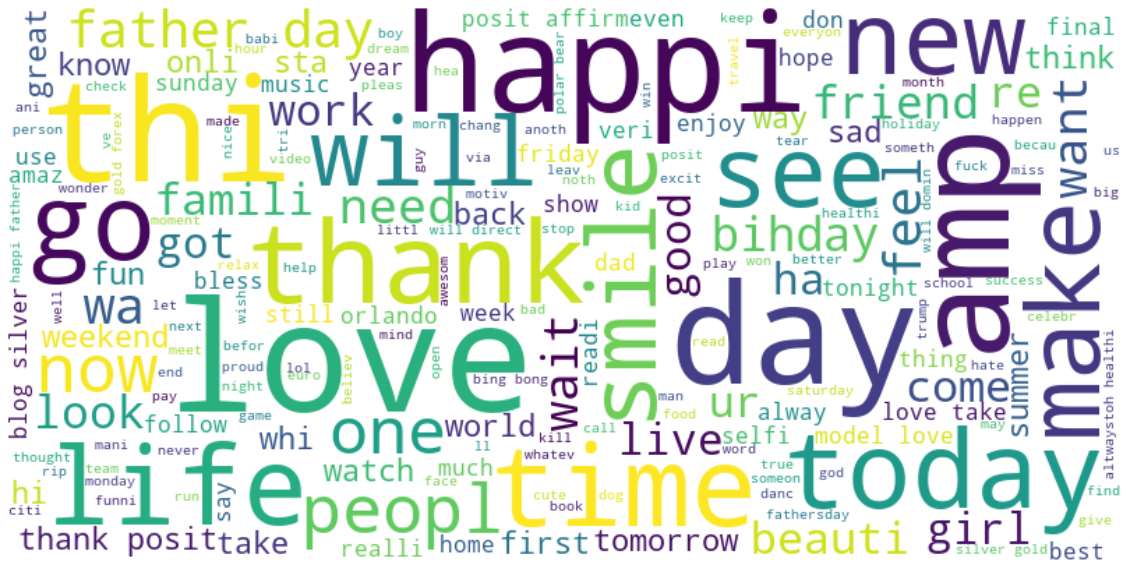

In [24]:
#non-racist wordcloud
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

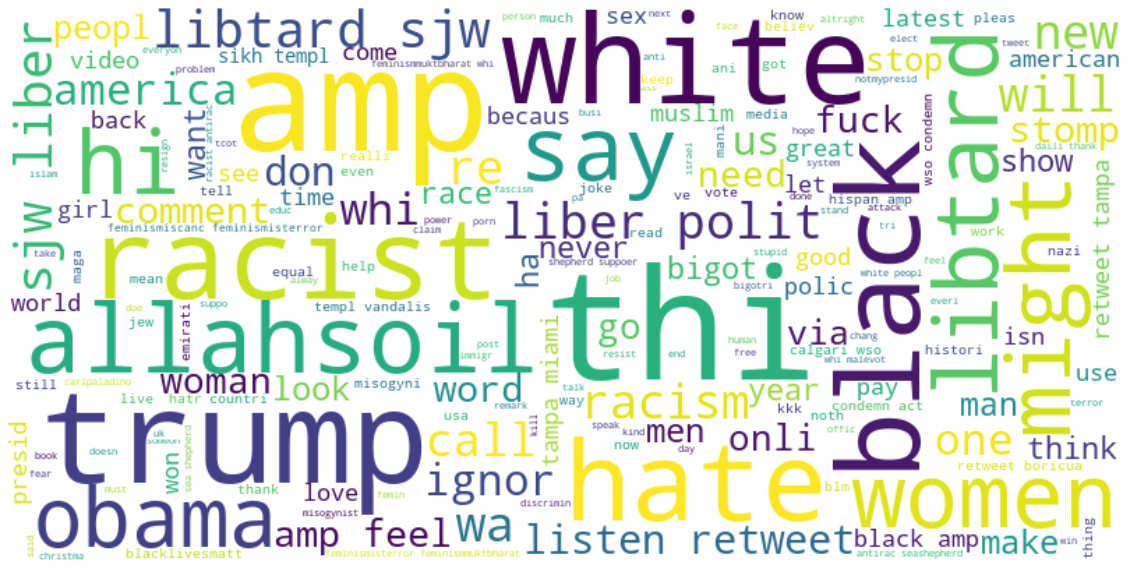

In [25]:
# racist wordcloud
bad_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1
                                                          ]])

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=21, max_font_size=110).generate(bad_words)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show();

### Understanding the impact of hastags

In [26]:
# function to collect hashtags
def extract_hashtag(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    
    return hashtags

In [27]:
# extract hashtags from 'normal' tweets
ht_normal = extract_hashtag(combi['tidy_tweet'][combi['label'] == 0])

# extract hashtags from 'bad' tweets
ht_bad = extract_hashtag(combi['tidy_tweet'][combi['label'] == 1])

In [28]:
# unnesting list
ht_normal = sum(ht_normal, [])
ht_bad = sum(ht_bad, [])

### Plotting top hashtags for tweet sets

[Text(0, 0.5, 'Count')]

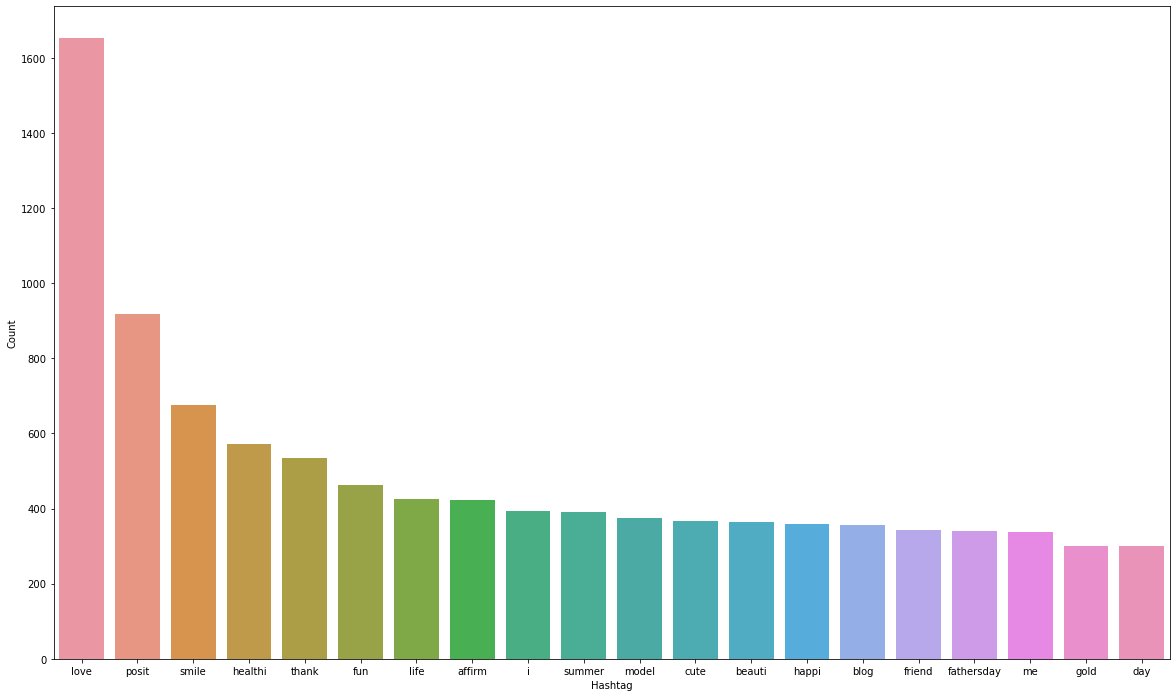

In [29]:
# plotting positive

a = nltk.FreqDist(ht_normal)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# selecting top 20 hashtags
d = d.nlargest(columns = 'Count', n = 20)

plt.figure(figsize = (20,12))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')

ax.set(ylabel = 'Count')

[Text(0, 0.5, 'Count')]

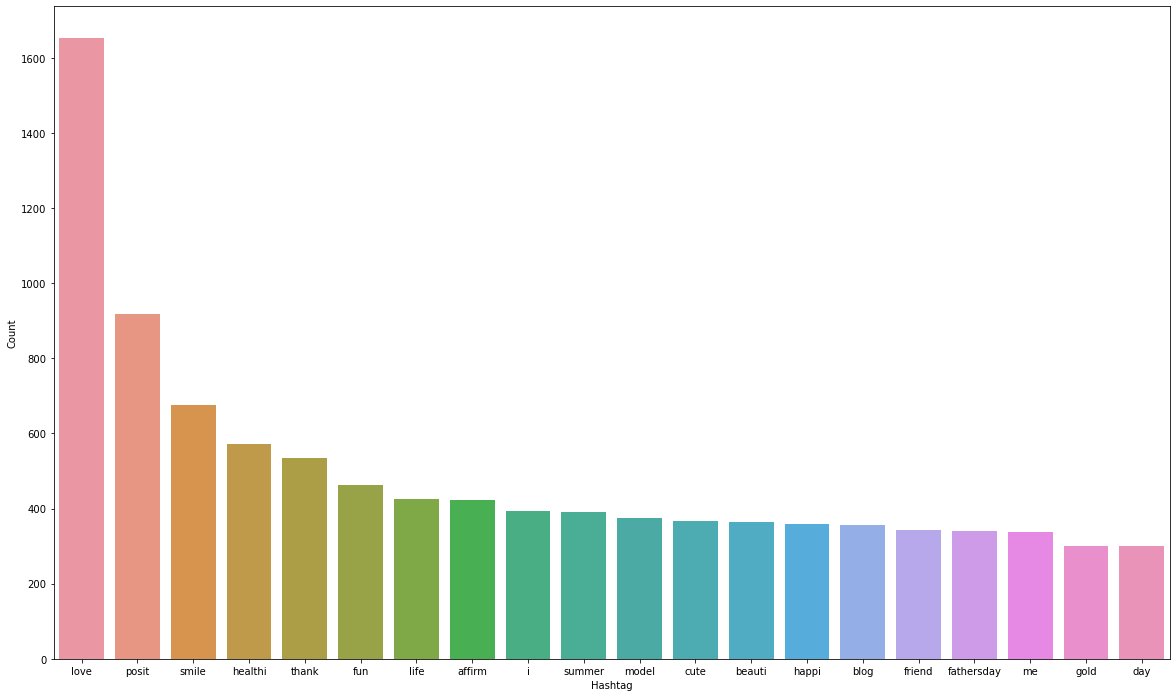

In [30]:
# plotting negative

b = nltk.FreqDist(ht_bad)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 20 hashtags
e = e.nlargest(columns = 'Count', n = 20)

plt.figure(figsize = (20,12))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')

ax.set(ylabel = 'Count')

## Bag of Words features

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [35]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

bow.shape

(49159, 1000)

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

tfidf.shape

(49159, 1000)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5595432300163132

In [38]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file